In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#векторы исходных значений
x = np.array([-1, -0.56, -0.13, 0.313, 0.75, 1.188, 1.625, 2.063, 2.5])
y = np.array([-5.317, -0.581, 1.137, 0.478, -0.790, -2.502, -2.482, 0.554, 7.904])

In [4]:
#метод наименьших квадратов
def mnk(x, y , m):
    t = np.array([x**exp for exp in range(m + 1)])
    rhs = t.dot(y)
    mat = np.empty((m+1, m+1))
    v = t.sum(axis = 1)
    for i in range(m+1):
        mat[i, :] = v
        v = np.roll(v, -1)
        v[-1] = np.sum(x**(i + m +1))
    return np.linalg.solve(mat, rhs)[::-1]

def err(p, x, y, m): #cреднеквадратичное отклонение
    return np.linalg.norm(p(x) - y)/np.sqrt(len(x) - m)

In [31]:
polynoms = np.array([np.poly1d(mnk(x,y,m)) for m in range(len(x))])
errors = np.array([err(p,x,y,p.order) for p in polynoms])

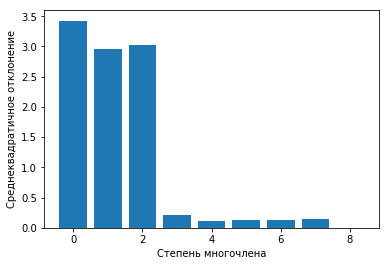

In [6]:
plt.bar(range(len(polynoms)), errors)
plt.ylabel("Среднеквадратичное отклонение")
plt.xlabel("Степень многочлена")
plt.show()
# из графика видно, что оптимальное значение m = 8

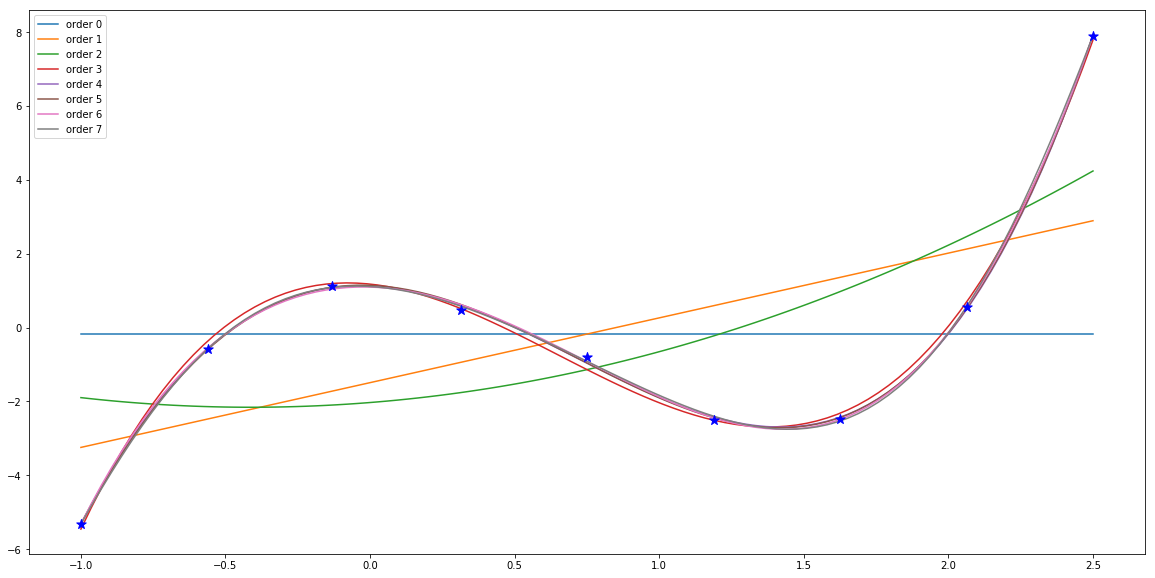

In [19]:
values = np.linspace(x.min(), x.max(), 100)
plt.figure(figsize = (20,10))
plt.scatter(x,y, c = 'blue', marker = '*', s = 100, zorder = len(polynoms)+1)
for i in range(8):
    plt.plot(values, polynoms[i](values), label = 'order '+ str(polynoms[i].order), zorder = i)
plt.legend()
plt.show()
    

In [21]:
t = np.array([5, 5.5, 6, 6.5, 7, 7.5 , 8, 8.5, 9])
x = np.array([13.85, 14.30, 15.84, 16.9, 18.89, 19.7, 21.03, 22.08, 23.59]) 
v, b = mnk(t,x,1)
print("x(2T) = ", b+v*2*t.max())# положение точки во время 2*T

x(2T) =  46.14044444444441


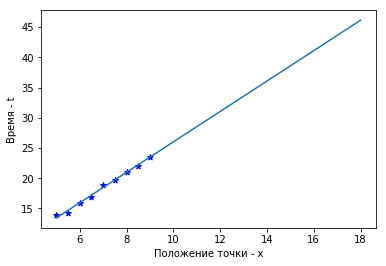

In [28]:
plt.scatter(t,x, c = 'blue', marker = '*')
values = np.linspace(t[0], 2*t.max(), 100)
plt.plot(values, b + v*values)
plt.xlabel("Положение точки - x")
plt.ylabel("Время - t")
plt.show()